In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('BlackFriday.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

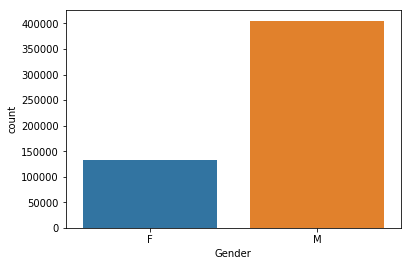

In [7]:
sns.countplot(x='Gender',data=train)

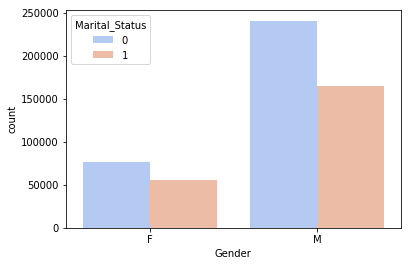

In [11]:
sns.countplot(x='Gender',data=train,hue='Marital_Status',palette='coolwarm')

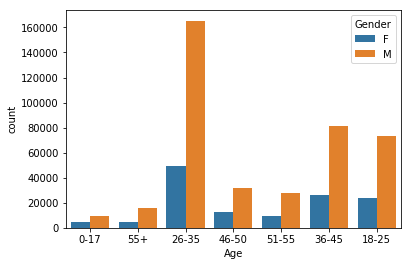

In [13]:
sns.countplot(x='Age',data=train,hue='Gender')

In [14]:
train['combined_G_M']=train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

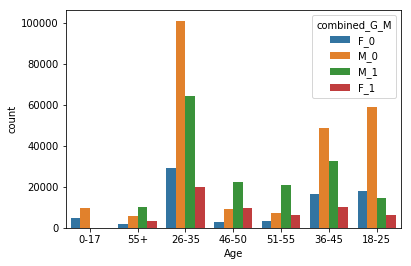

In [15]:
sns.countplot(x='Age',data=train,hue='combined_G_M')

In [17]:
train.fillna(value=0,inplace=True)

In [18]:
train['Product_Category_2']=train['Product_Category_2'].astype(int)
train['Product_Category_3']=train['Product_Category_3'].astype(int)

In [20]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)

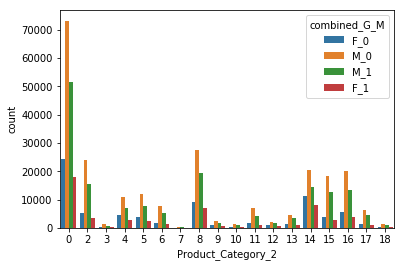

In [24]:
sns.countplot(x='Product_Category_2',data=train,hue='combined_G_M')

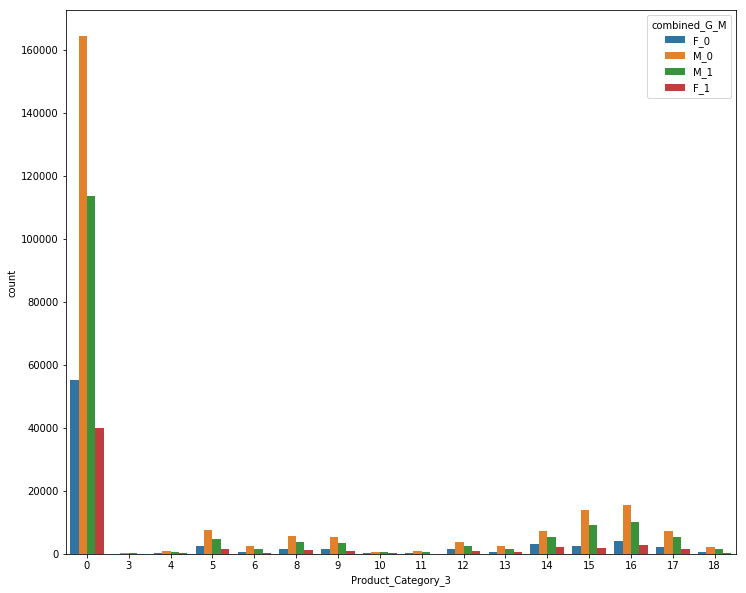

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(x='Product_Category_3',data=train,hue='combined_G_M')

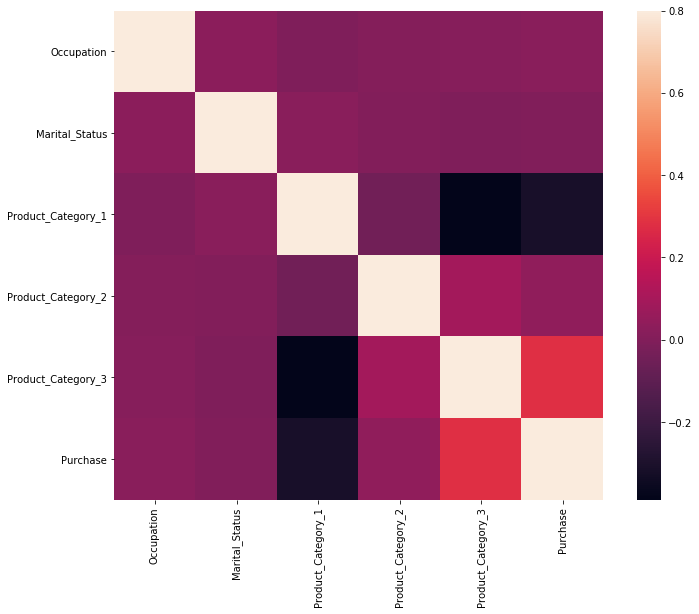

In [30]:
corrmat=train.corr()
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [31]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,F,0-17,10,A,2,0,3,0,0,8370,F_0
1,F,0-17,10,A,2,0,1,6,14,15200,F_0
2,F,0-17,10,A,2,0,12,0,0,1422,F_0
3,F,0-17,10,A,2,0,12,14,0,1057,F_0
4,M,55+,16,C,4+,0,8,0,0,7969,M_0


In [32]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
train['Gender'] = train['Gender'].apply(map_gender)

In [33]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

train['Age'] = train['Age'].apply(map_age)

In [34]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
train['City_Category']=train['City_Category'].apply(map_city_categories)

In [35]:
def map_stay(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].apply(map_stay)

In [36]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,0,0,10,2,2,0,3,0,0,8370,F_0
1,0,0,10,2,2,0,1,6,14,15200,F_0
2,0,0,10,2,2,0,12,0,0,1422,F_0
3,0,0,10,2,2,0,12,14,0,1057,F_0
4,1,6,16,0,4,0,8,0,0,7969,M_0


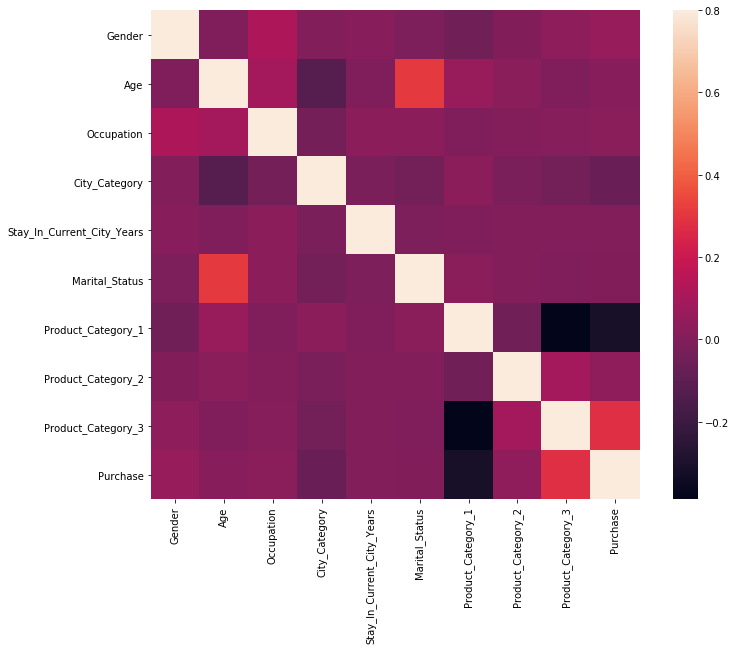

In [41]:
corrmat=train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [42]:
corrmat

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004413,0.117294,0.004129,0.015392,-0.010379,-0.045661,-0.001580,0.035813,0.060086
Age,-0.004413,1.000000,0.091898,-0.122308,-0.004754,0.312079,0.061951,0.019723,-0.006922,0.017717
Occupation,0.117294,0.091898,1.000000,-0.033781,0.031203,0.024691,-0.008114,0.006792,0.011941,0.021104
City_Category,0.004129,-0.122308,-0.033781,1.000000,-0.019948,-0.040173,0.027444,-0.019535,-0.037751,-0.068507
Stay_In_Current_City_Years,0.015392,-0.004754,0.031203,-0.019948,1.000000,-0.012663,-0.004182,0.001244,0.001992,0.005470
Marital_Status,-0.010379,0.312079,0.024691,-0.040173,-0.012663,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,-0.045661,0.061951,-0.008114,0.027444,-0.004182,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,-0.001580,0.019723,0.006792,-0.019535,0.001244,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.035813,-0.006922,0.011941,-0.037751,0.001992,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.060086,0.017717,0.021104,-0.068507,0.005470,0.000129,-0.314125,0.038395,0.284120,1.000000
